In [1]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
os.environ['PYTHONPATH'] = ':'.join(sys.path)

In [2]:
import numpy as np
from copy import deepcopy

import hgpflow_v2.performance # don't know why this is needed, but it is
from hgpflow_v2.performance.performance import PerformanceCLIC

In [3]:
save_dir = ...
SAVE_FIG = False

In [ ]:
truth_path = 'path to truth.root'
pred_path_mlpf = 'path to MLPF prediction.root'
hgpflow_target_path = None
pred_path = 'path to HGPflow prediction.root'
perf_obj = PerformanceCLIC(
    truth_path, pred_path, ind_threshold=0.65, pred_path_mlpf=pred_path_mlpf, num_ev_in_one_file=5000,
    topo=False, truth_event_number_offset=55000, hgpf_target_path=hgpflow_target_path)

### Overwrite

- `hgpflow_pt` for neutral particles is better than `proxy_pt`
- But the rest are just worse
- So, I will just overwrite the `hgpflow_xxx` with `proxy_xxx` for the rest

In [5]:
perf_obj.hgpflow_dict['hgpflow_eta'] = perf_obj.hgpflow_dict['proxy_eta']
perf_obj.hgpflow_dict['hgpflow_phi'] = perf_obj.hgpflow_dict['proxy_phi']
perf_obj.hgpflow_dict['hgpflow_pt'] = perf_obj.hgpflow_dict['proxy_pt']

for i in range(len(perf_obj.hgpflow_dict['hgpflow_pt'])):
    ch_mask = perf_obj.hgpflow_dict['hgpflow_class'][i] <= 2
    perf_obj.hgpflow_dict['hgpflow_pt'][i][ch_mask] = perf_obj.hgpflow_dict['proxy_pt'][i][ch_mask]

In [ ]:
perf_obj.compute_jets(n_procs=30)
perf_obj.match_jets()

### Jet residual plots

In [8]:
from hgpflow_v2.performance.plot_helper_event import compute_jet_residual_dict

_dict = {
    'pandora': perf_obj.truth_dict['matched_pandora_jets'],
    'mlpf': perf_obj.mlpf_dict['matched_mlpf_jets'],
    'hgpflow': perf_obj.hgpflow_dict['matched_hgpflow_jets'],
}

jet_residual_dict = compute_jet_residual_dict(_dict, dr_cut=0.1, leading_N_jets=2, pt_min=10)

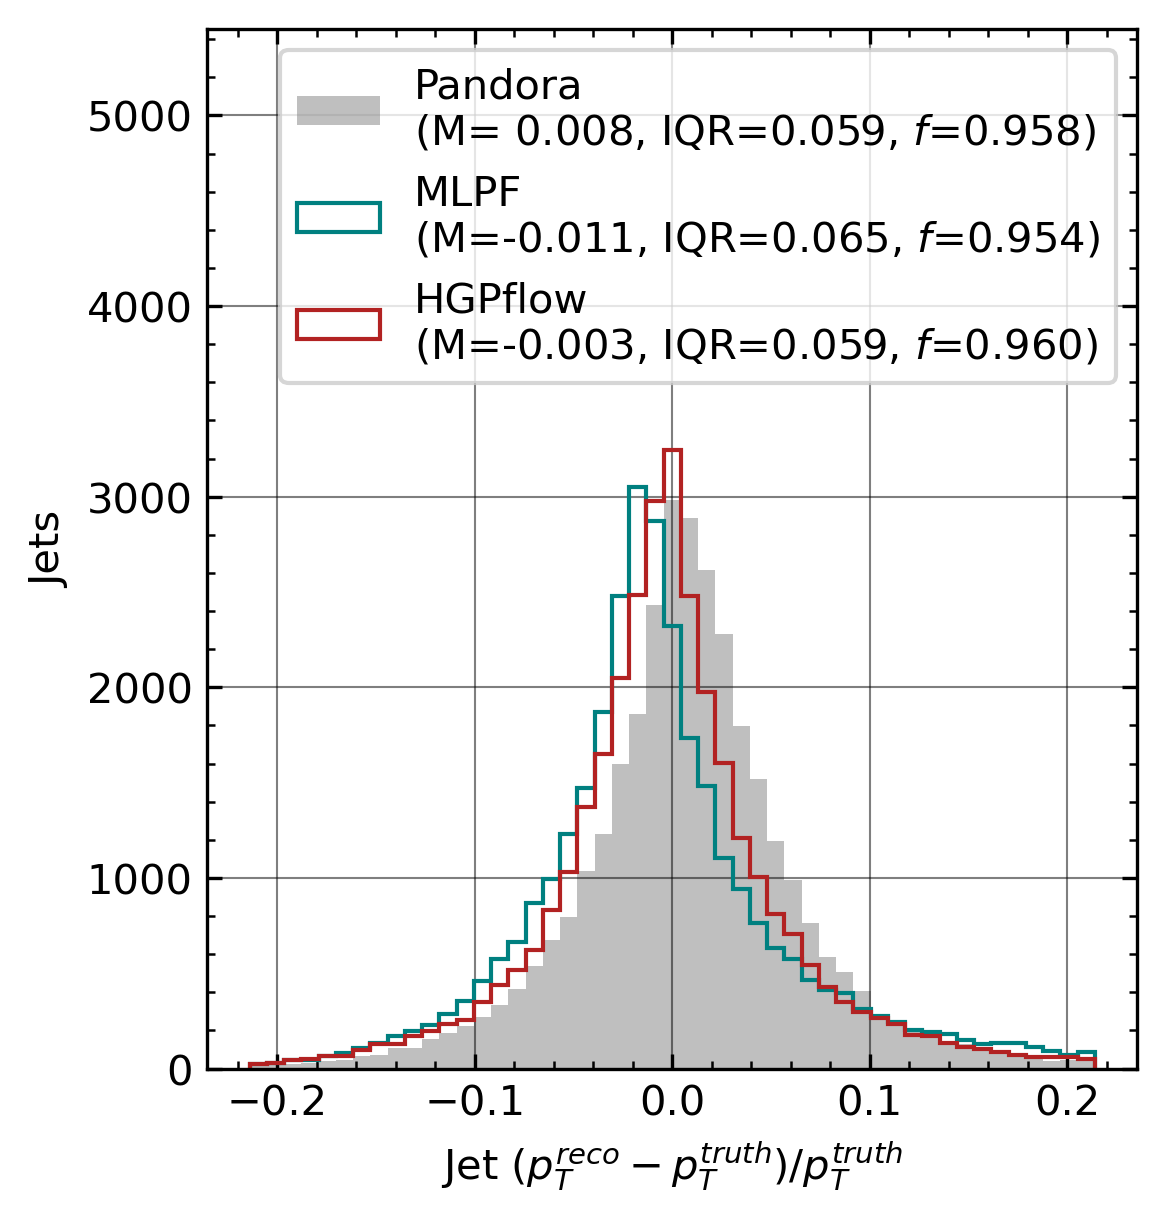

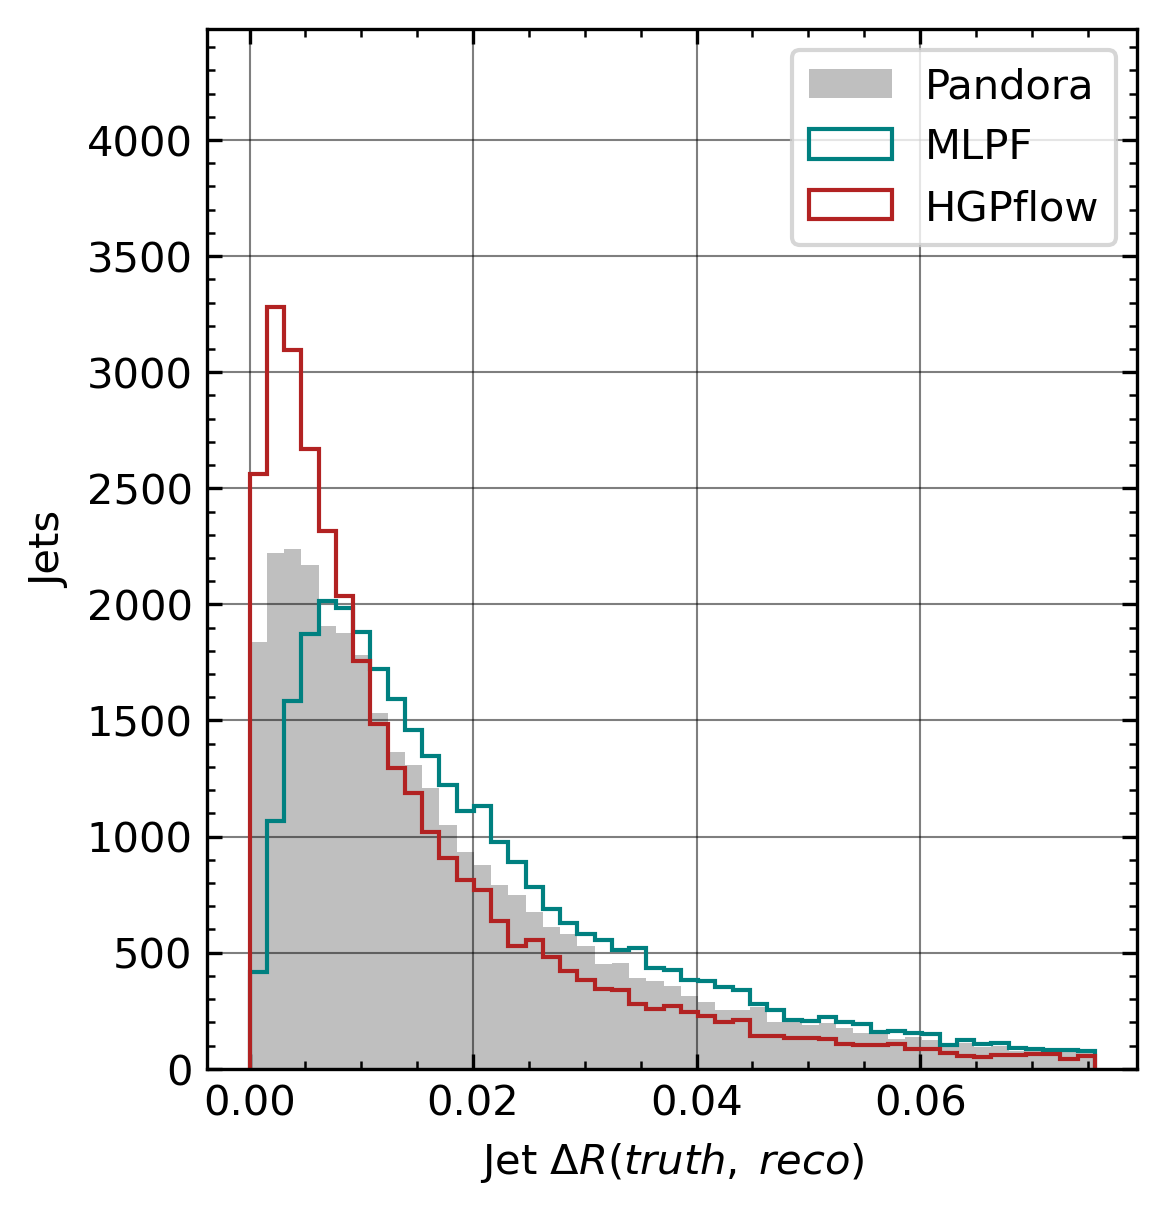

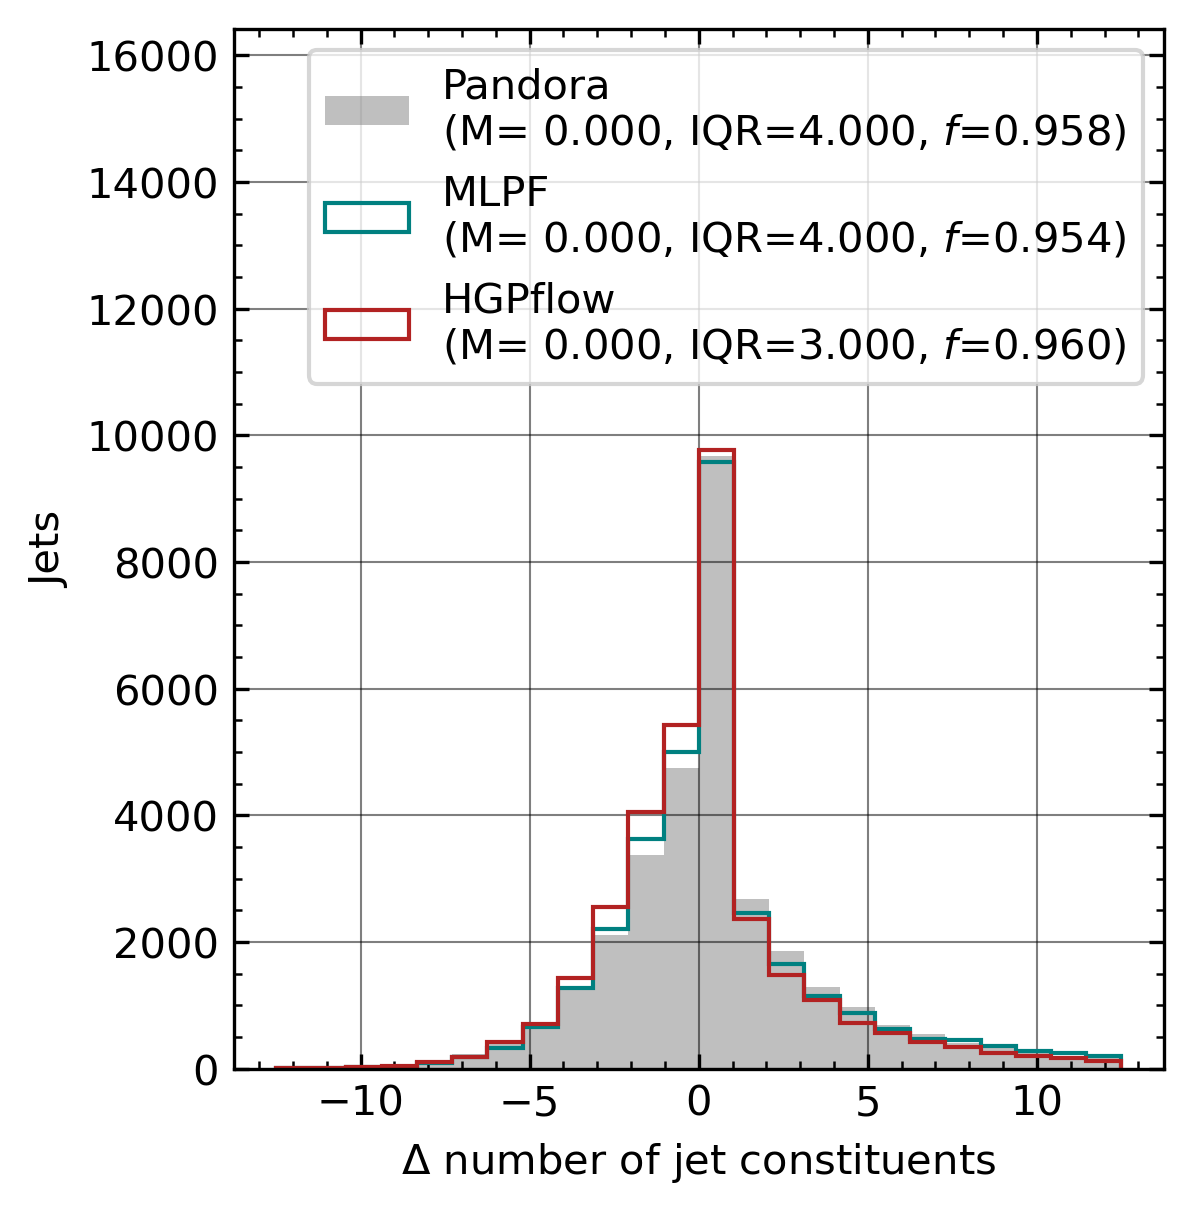

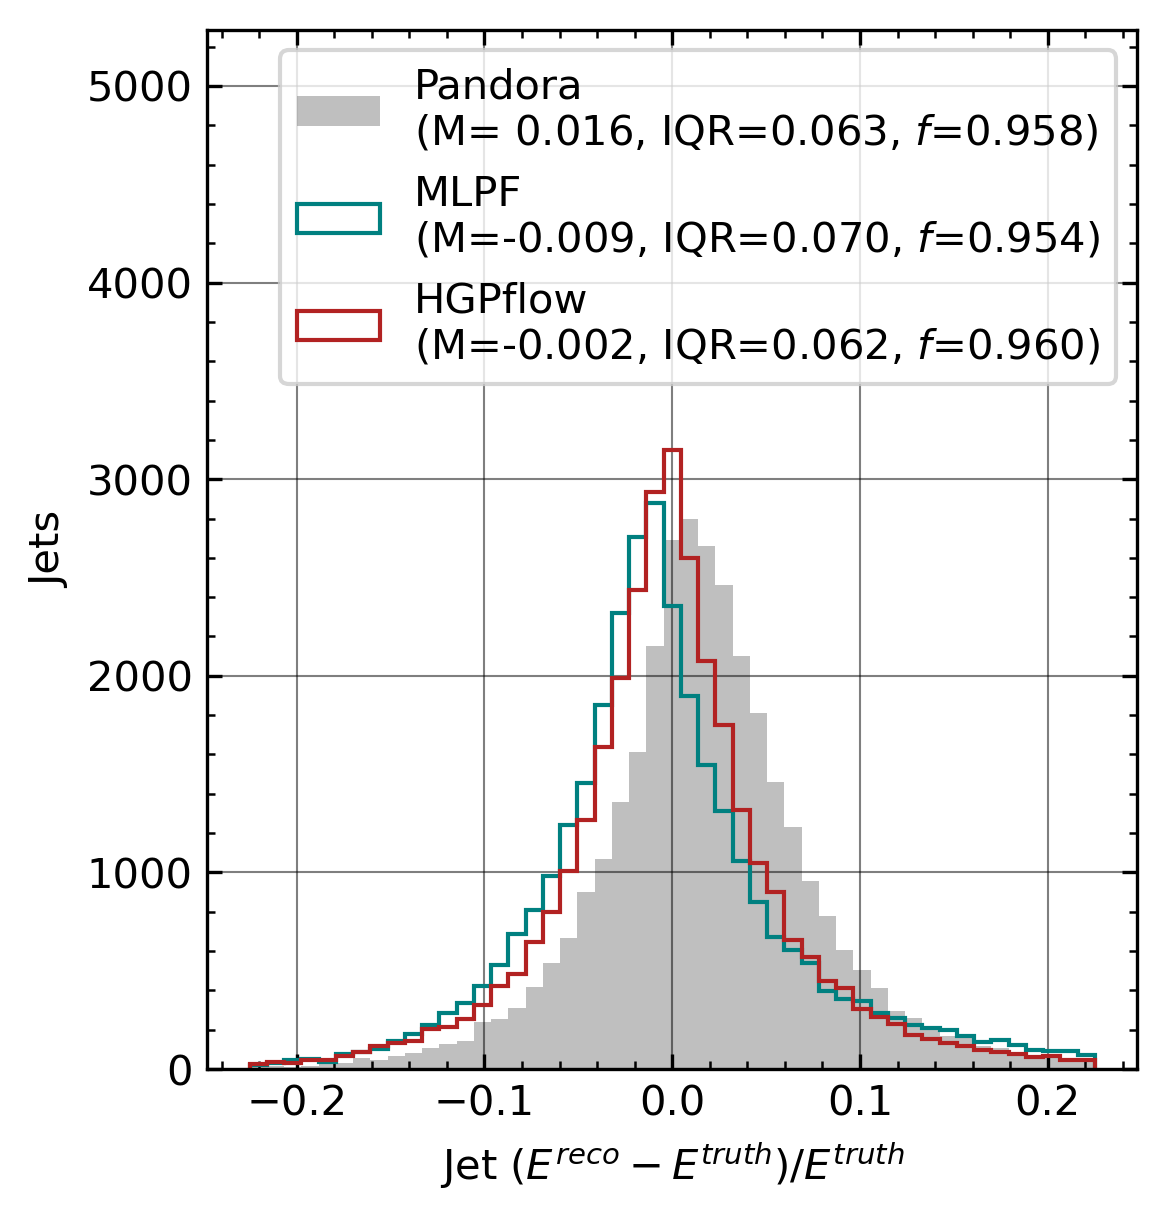

In [10]:
from hgpflow_v2.performance.plot_helper_event import plot_jet_residuals

# change the x_lims

figs = plot_jet_residuals(jet_residual_dict, pt_relative=True, separate_figures=True)
if SAVE_FIG:
    figs[0].savefig(f'{save_dir}/clic_dijet_jet_residuals_pt.png', dpi=300)
    figs[1].savefig(f'{save_dir}/clic_dijet_jet_residuals_dr.png', dpi=300)
    figs[2].savefig(f'{save_dir}/clic_dijet_jet_residuals_constcount.png', dpi=300)
    figs[3].savefig(f'{save_dir}/clic_dijet_jet_residuals_e.png', dpi=300)

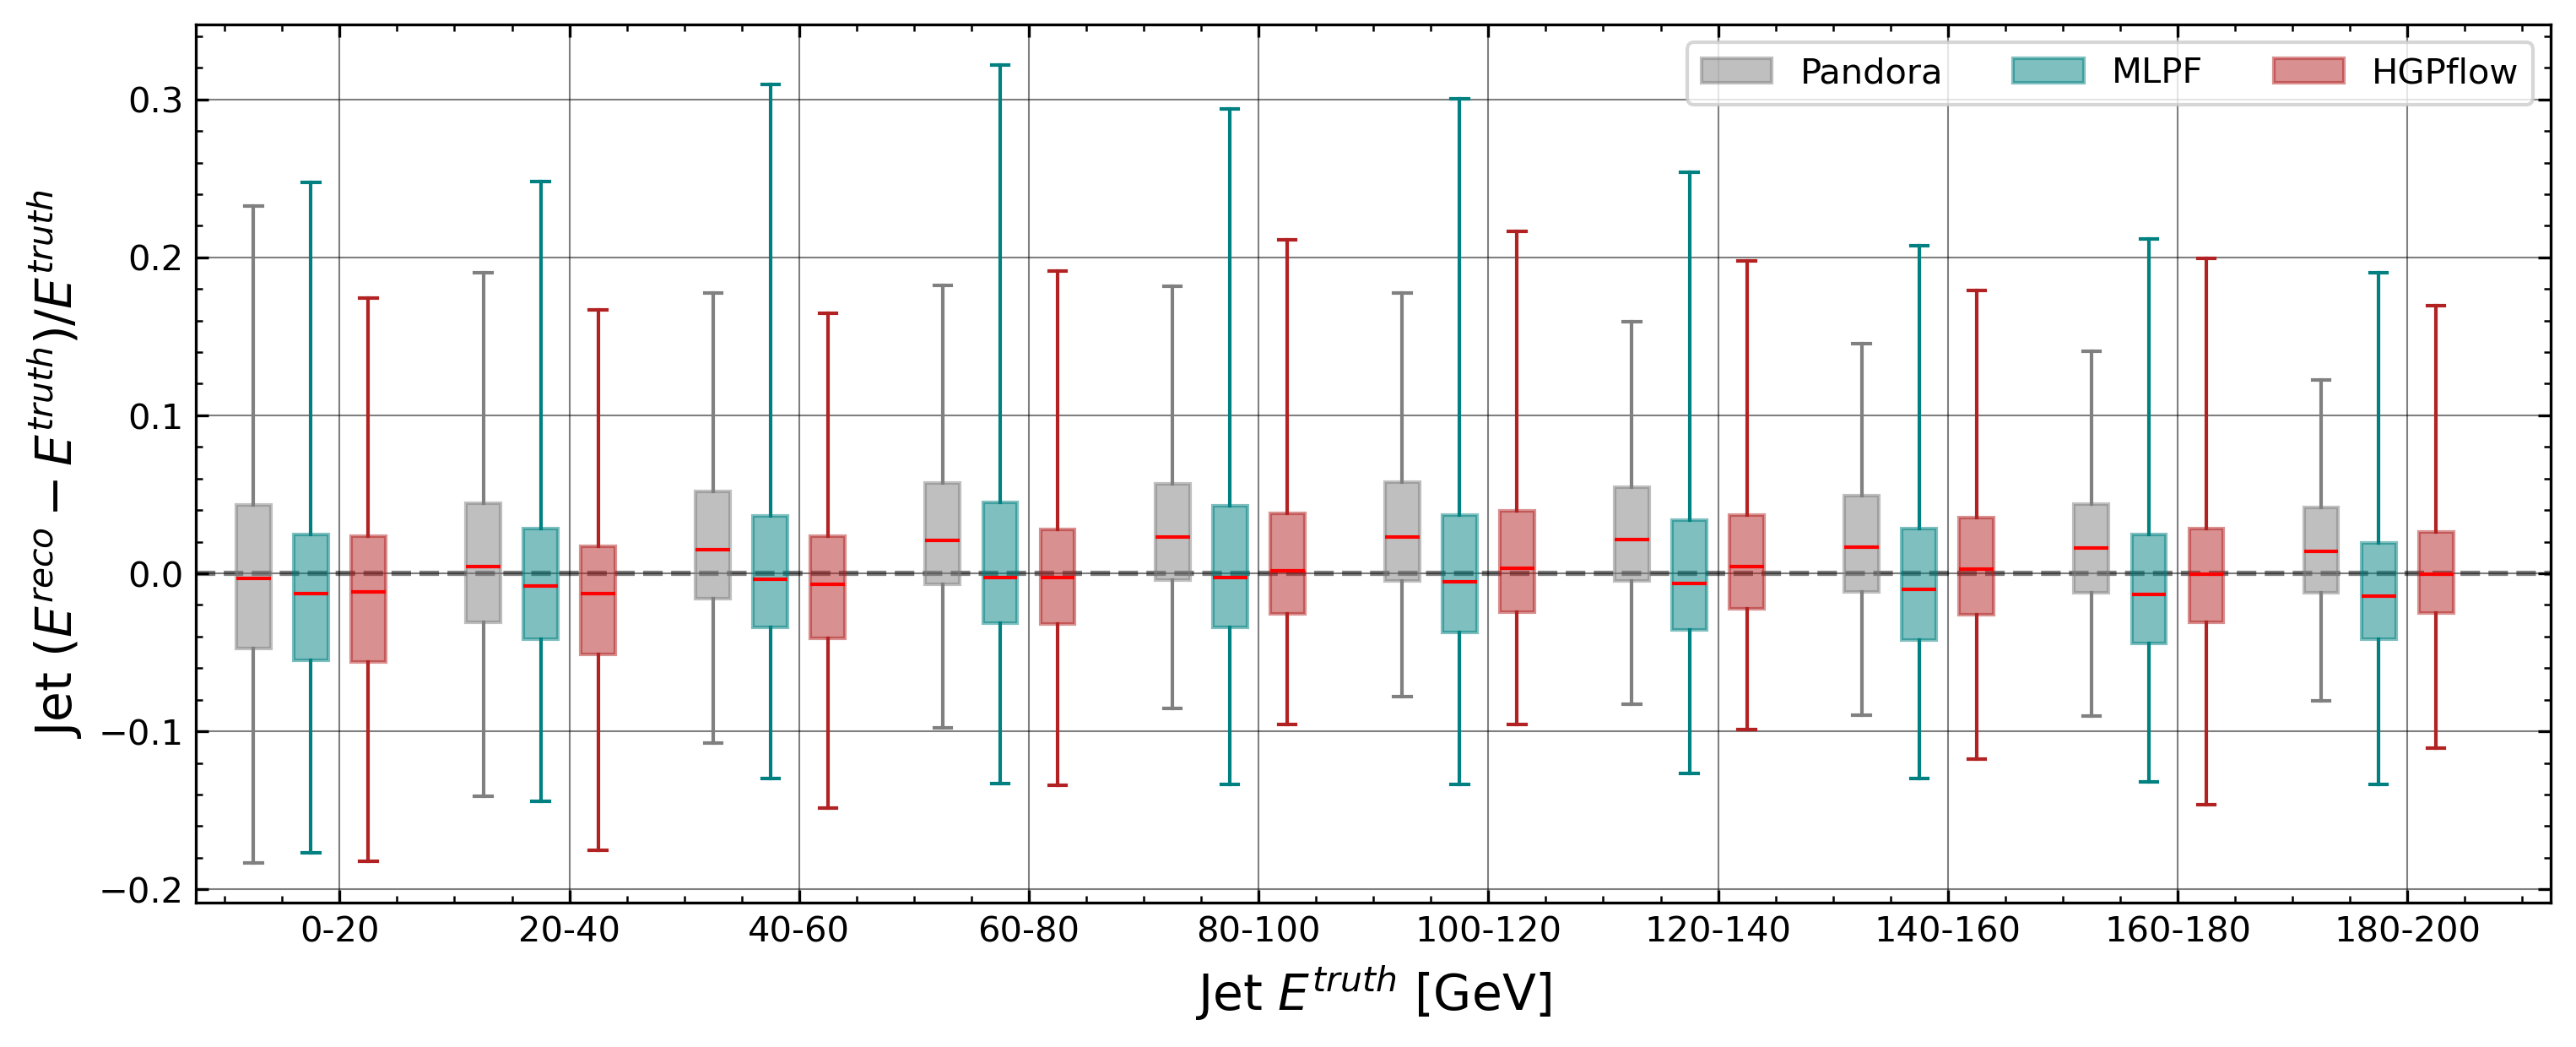

In [11]:
from hgpflow_v2.performance.plot_helper_event import plot_jet_res_boxplot

pt_bins = np.array([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200])
fig = plot_jet_res_boxplot(jet_residual_dict, bins=pt_bins, var='e')

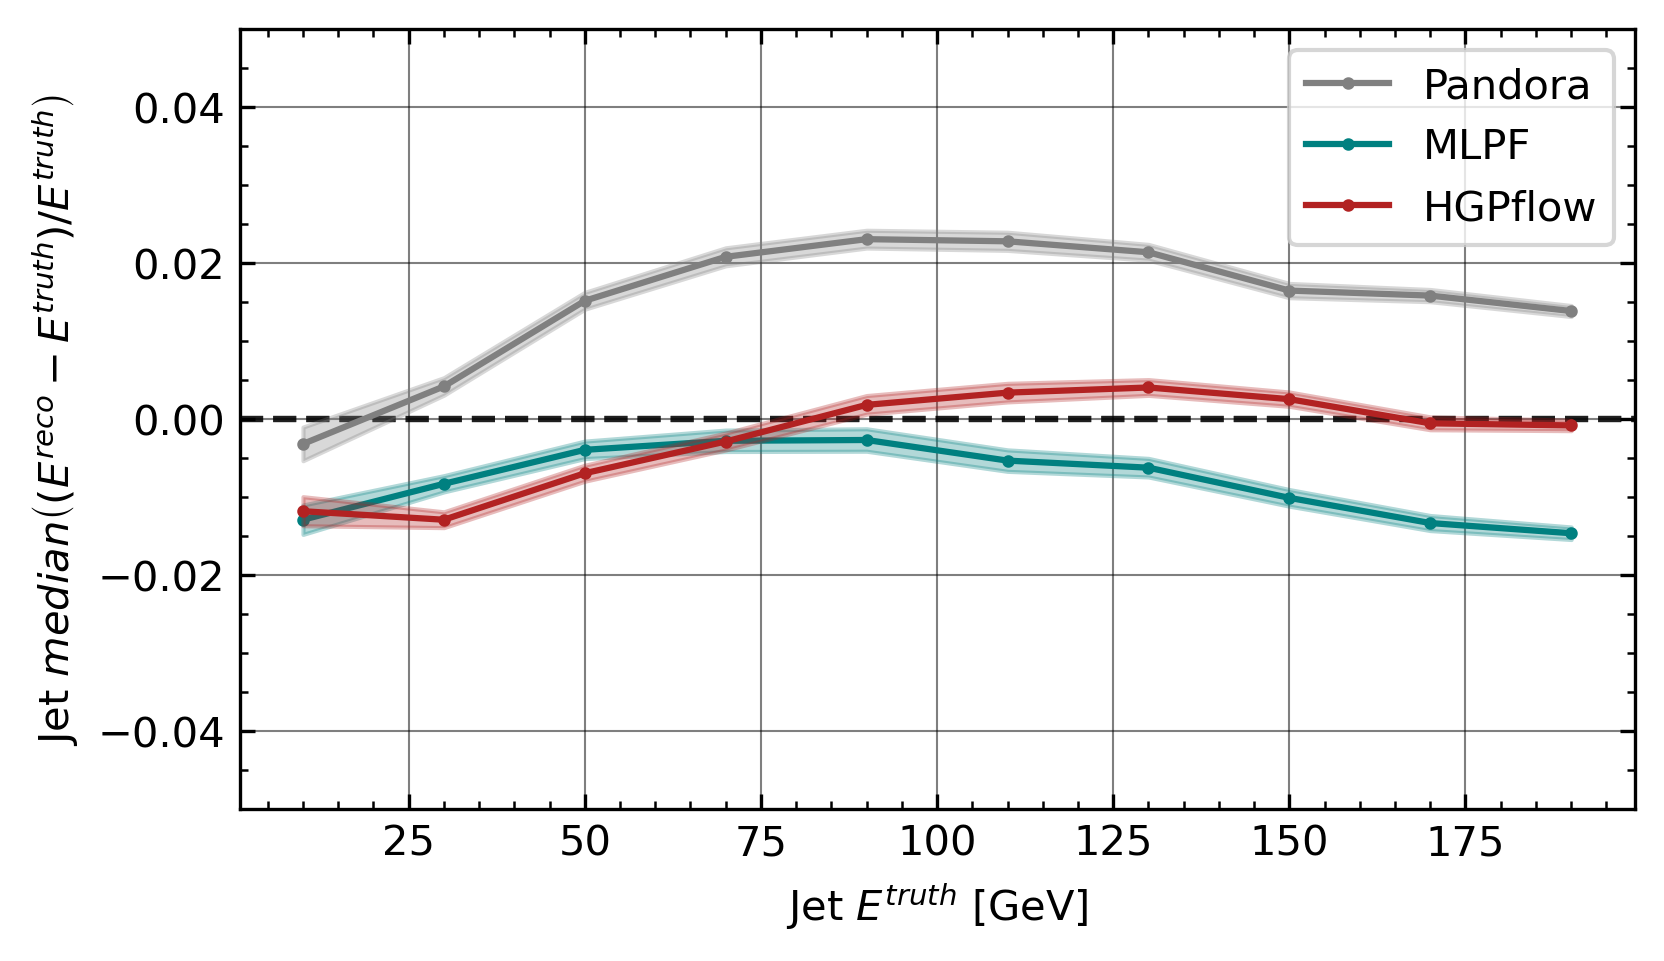

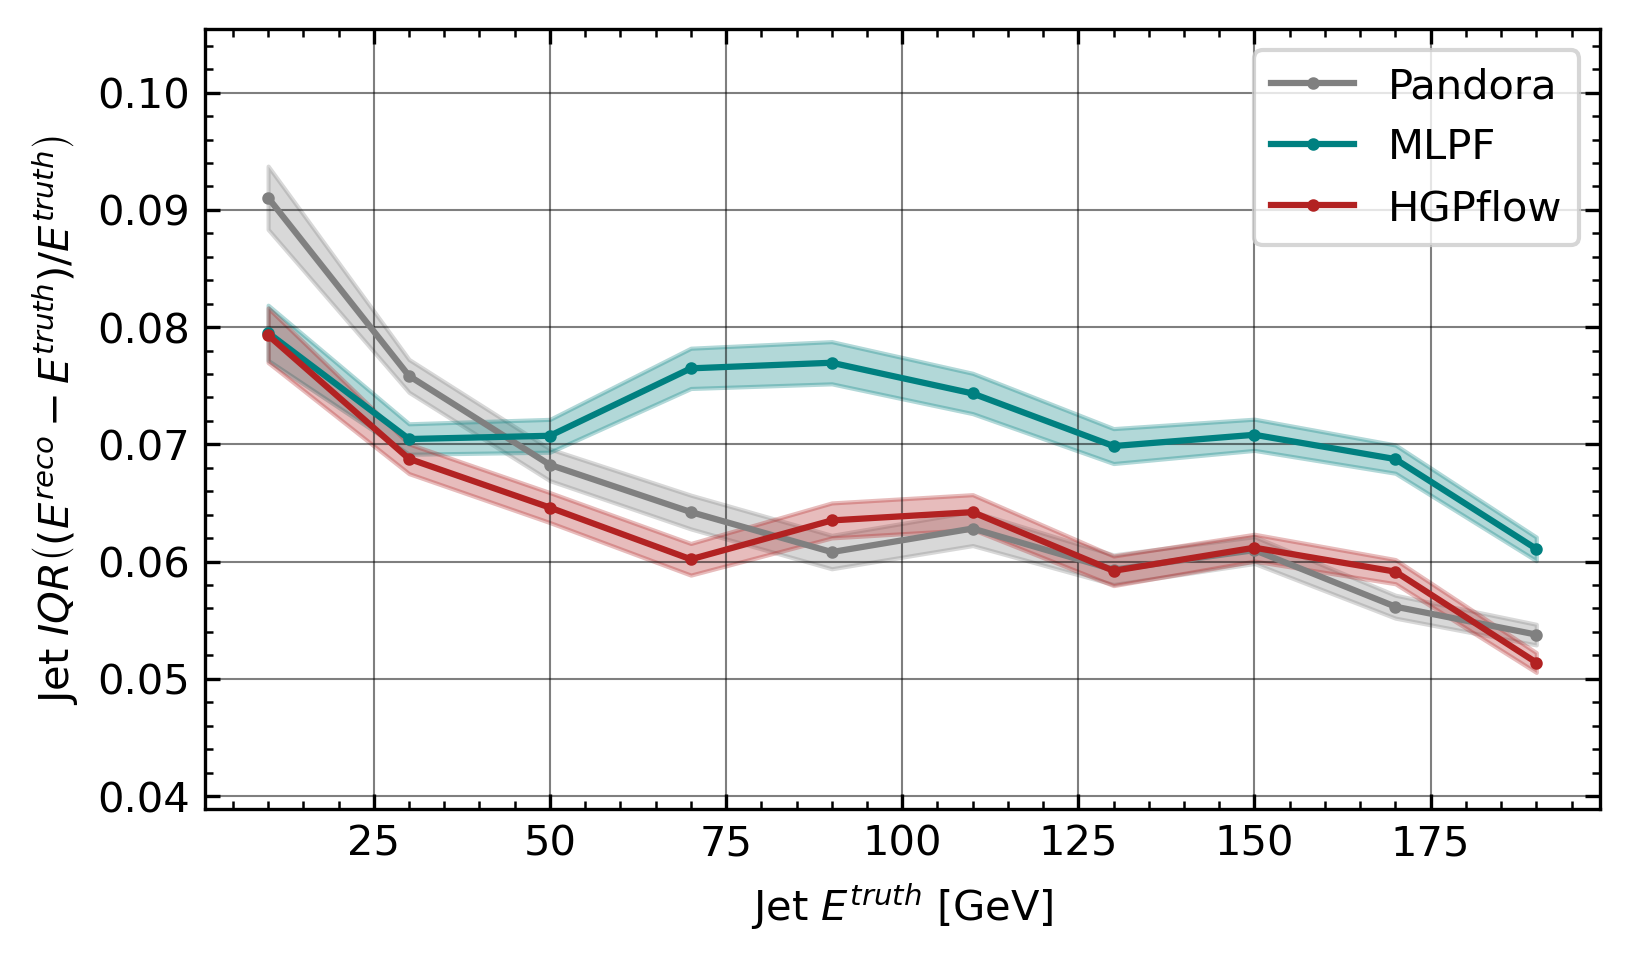

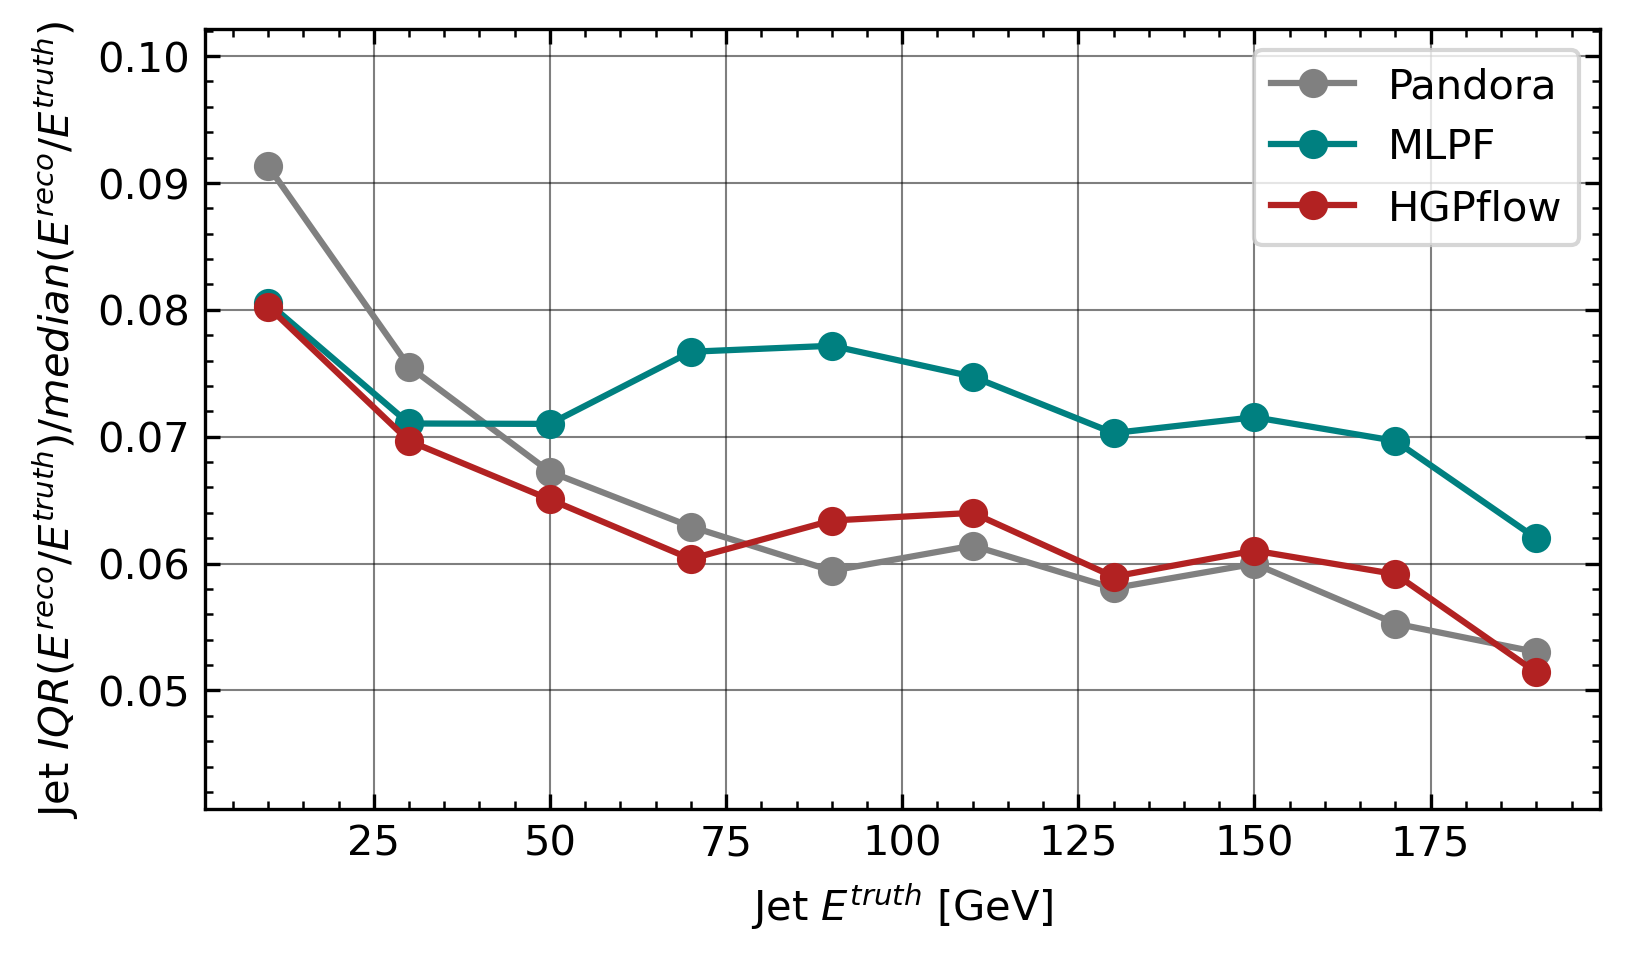

In [12]:
from hgpflow_v2.performance.plot_helper_event import plot_jet_response

pt_bins = np.array([0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200])
fig = plot_jet_response(jet_residual_dict, pt_bins=pt_bins, use_energy=True, separate_figures=True)

### jet marginal distributions

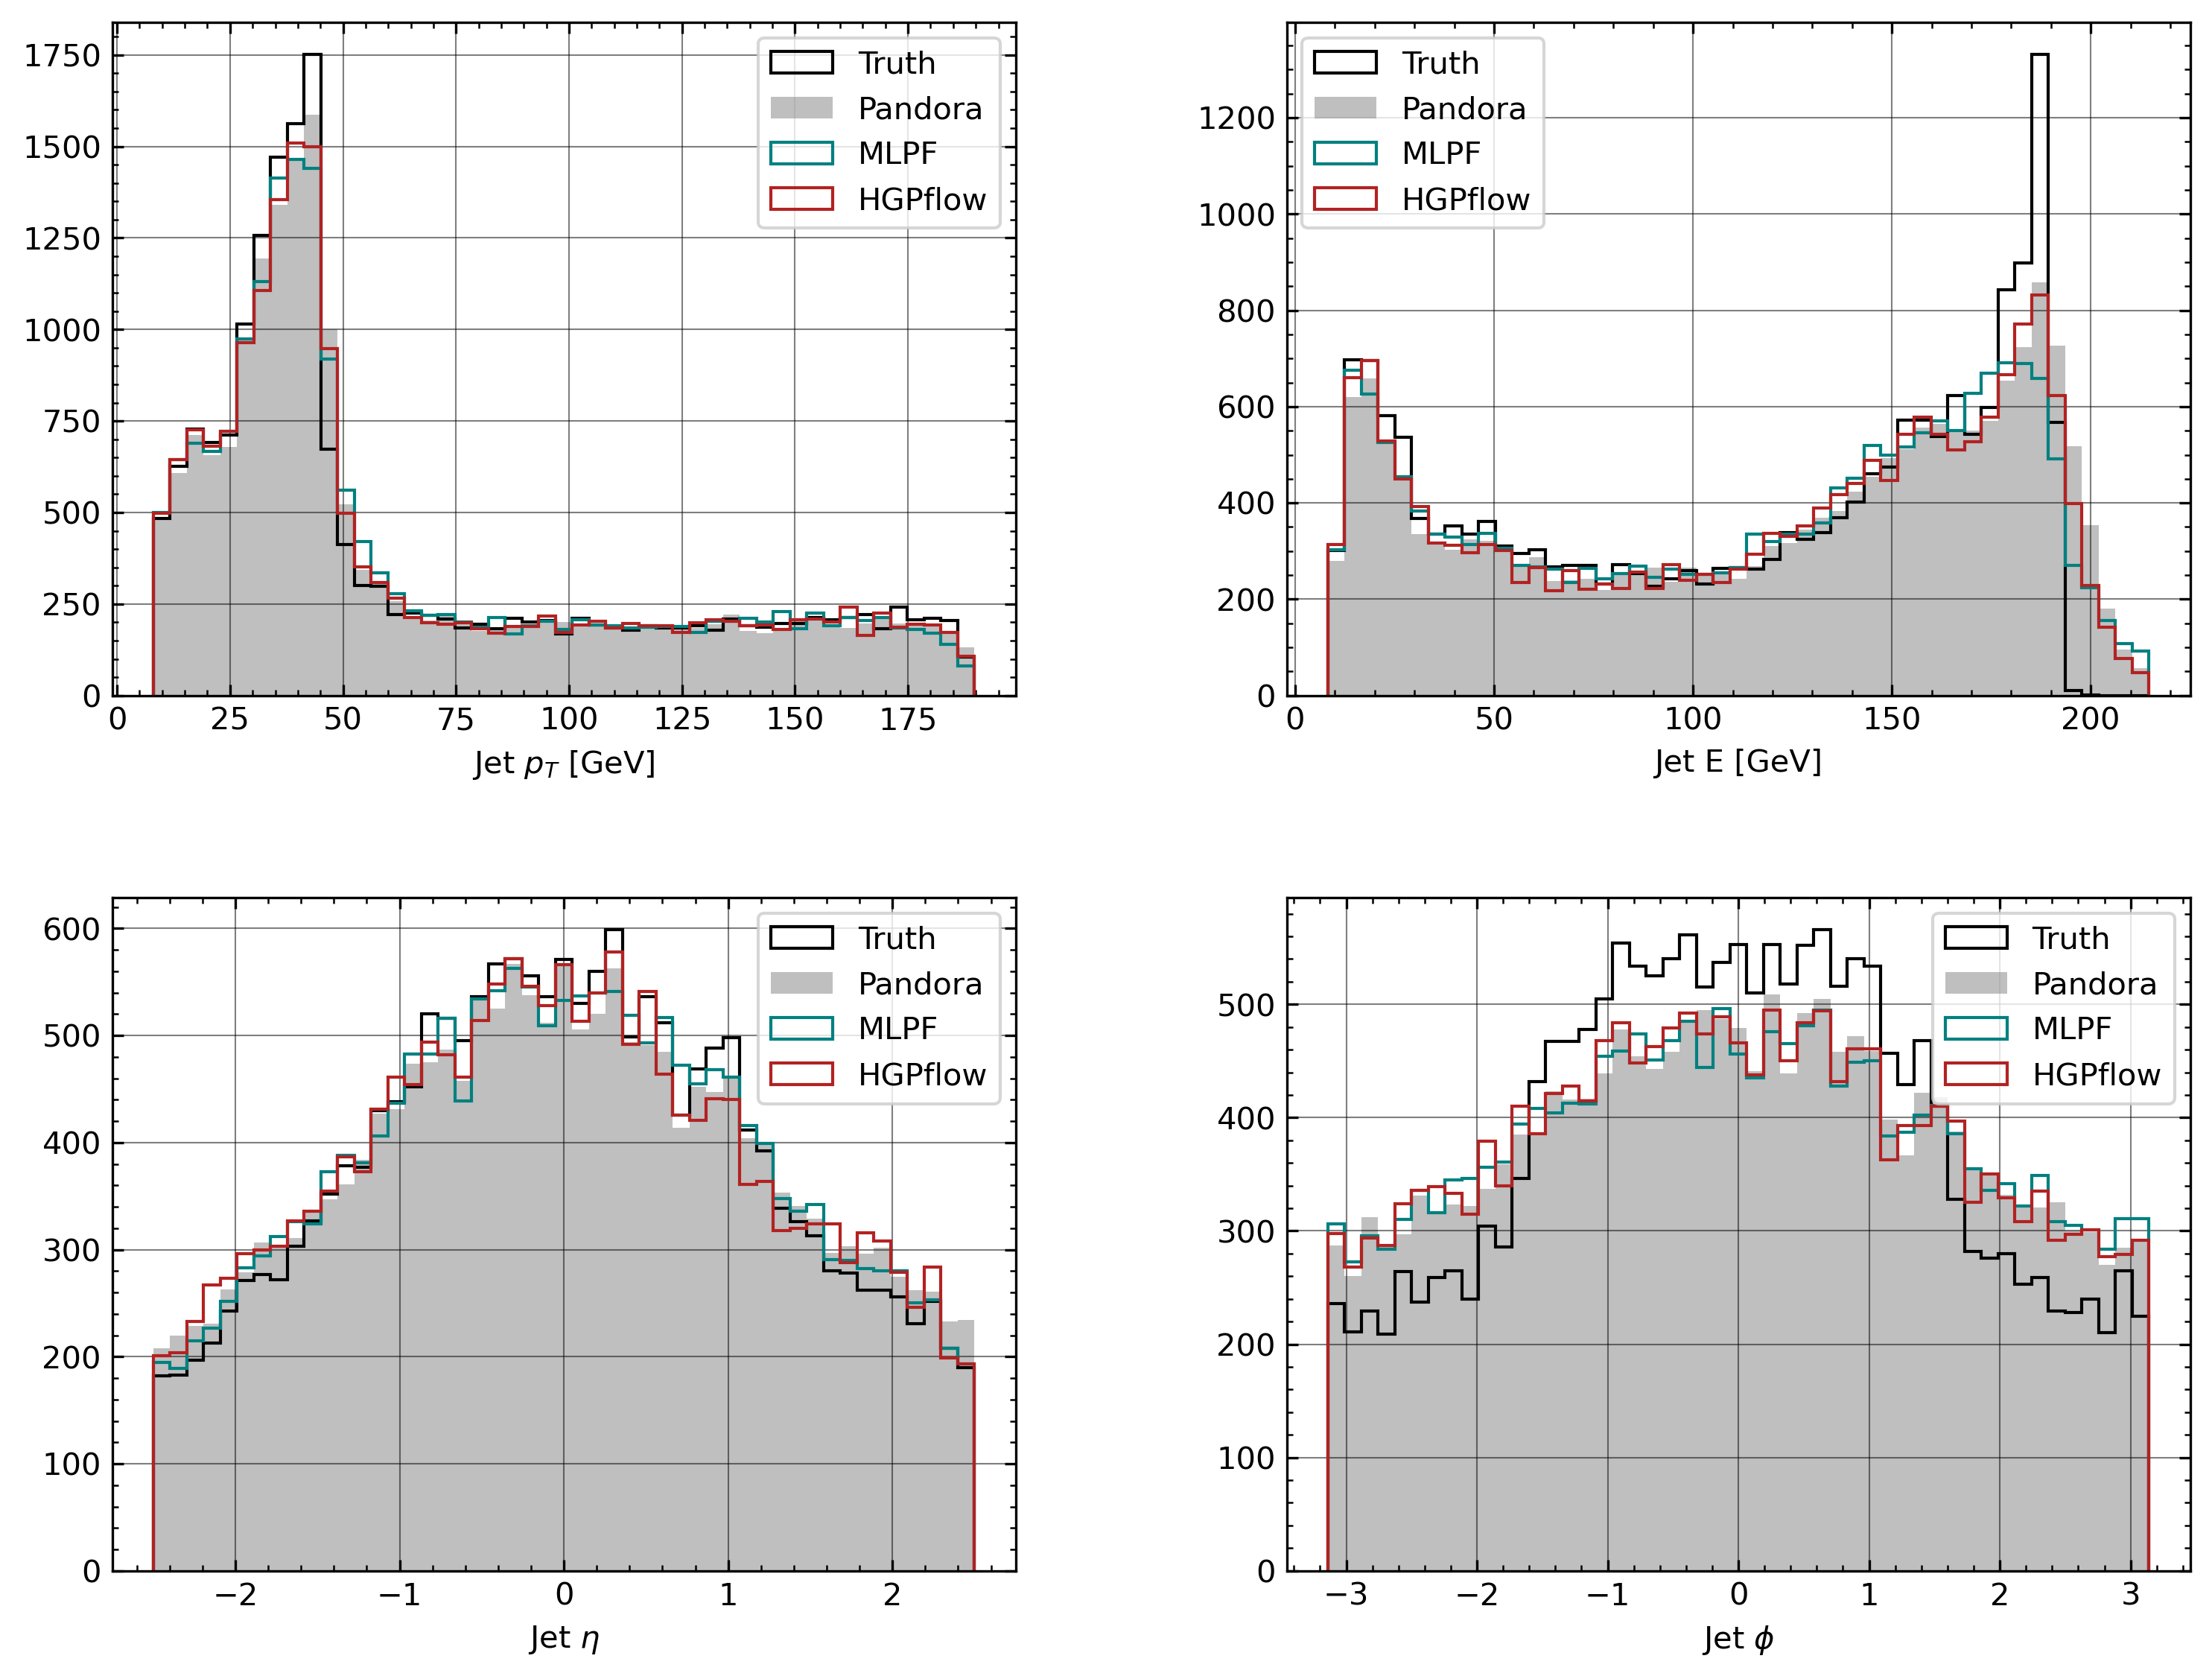

In [14]:
from hgpflow_v2.performance.plot_helper_event import plot_jet_marginals

jet_dict = {
    'truth': perf_obj.truth_dict['truth_jets'],
    'pandora': perf_obj.truth_dict['pandora_jets'],
    'mlpf': perf_obj.mlpf_dict['jets'],
    'hgpflow': perf_obj.hgpflow_dict['jets'],
}

fig = plot_jet_marginals(jet_dict, nleading=1, stylesheet=None)